In [1]:
from luwiji.logistic_regression import illustration,demo

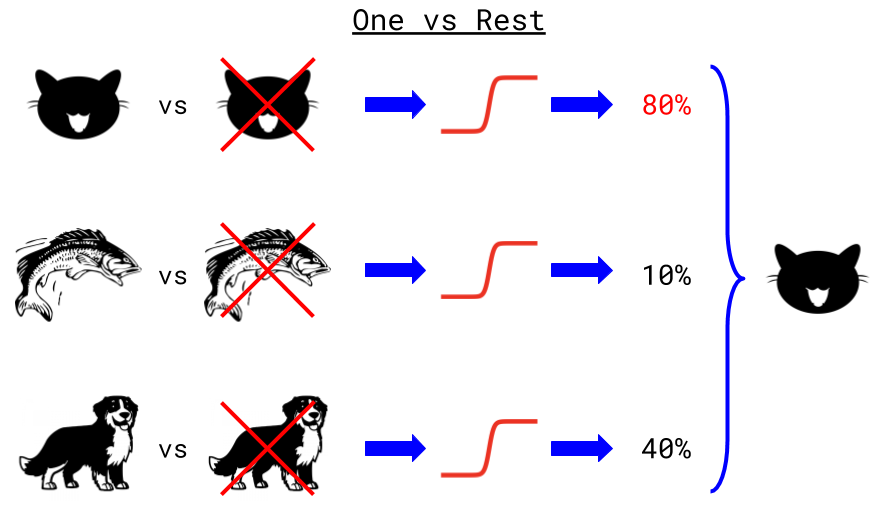

In [2]:
illustration.one_vs_rest

In [3]:
from sklearn.linear_model import LogisticRegression

In [4]:
model=LogisticRegression(multi_class='ovr')

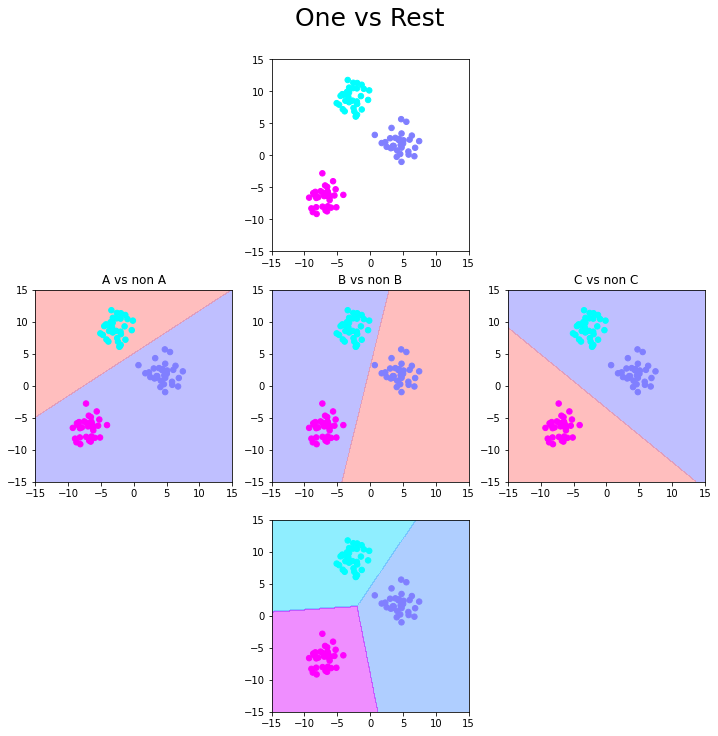

In [5]:
demo.one_vs_rest()

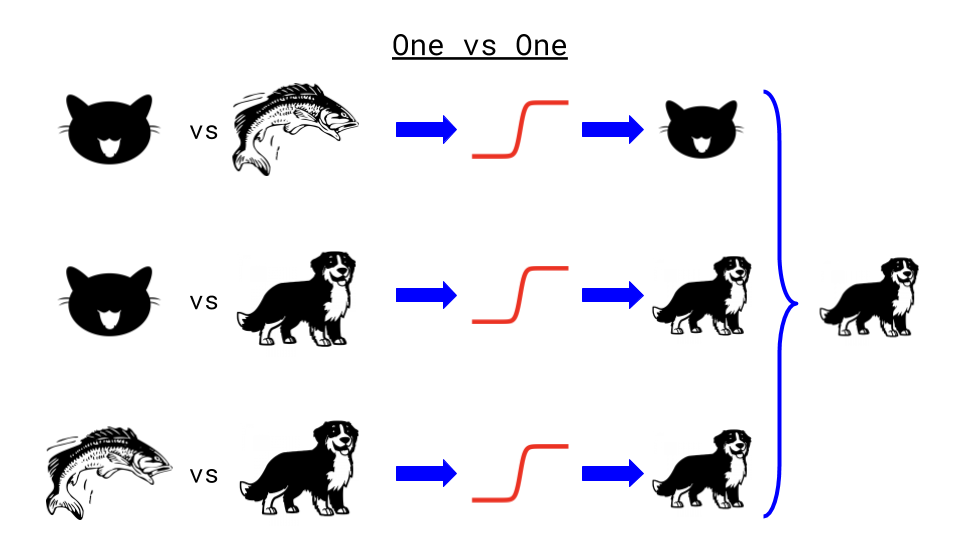

In [6]:
illustration.one_vs_one

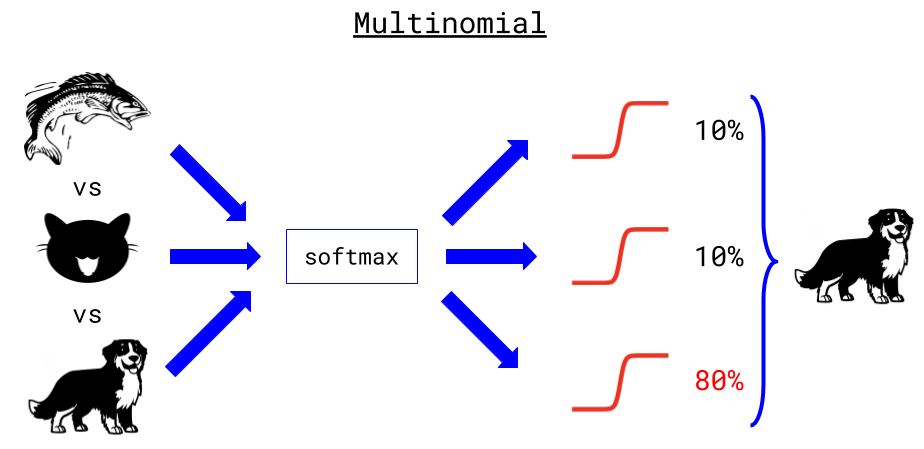

In [7]:
illustration.multinomial

In [8]:
from luwiji.random_forest import illustration,demo

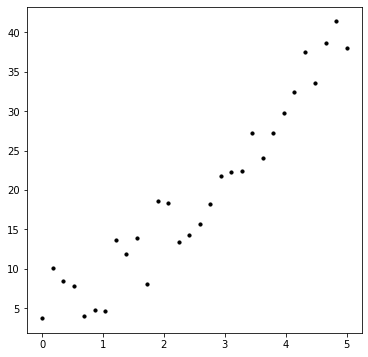

In [10]:
demo.data()

In [11]:
demo.decision_tree()

interactive(children=(SelectionSlider(description='decision', index=10, options=(0.08620689655172414, 0.258620…

In [12]:
demo.max_depth()

interactive(children=(IntSlider(value=1, description='depth', max=7, min=1), Checkbox(value=False, description…

In [13]:
from sklearn.tree import DecisionTreeClassifier

nodes

root nodes
inner nodes
leaf nodes(nodes paling akhir)

In [ ]:
modelDT = DecisionTreeClassifier(max_depth=None)#bisa kita tuning

In [14]:
demo.min_samples_leaf()

interactive(children=(IntSlider(value=1, description='depth', max=7, min=1), IntSlider(value=1, description='m…

In [15]:
demo.bootstrap()
#bootsrap ngambil random 70 persen data diambil, dia gamake semuanya jadi jumlahnya emg 100 tapi yang diambil 70 doang otomatis yang lain meleset
#tujuannya buat ngurangin overfitting

interactive(children=(ToggleButton(value=False, description='bootstrap'), ToggleButton(value=False, descriptio…

In [ ]:
#metode ngurangin dari strong learner ke good learner itu namanya begging
bagging -> bootstrap agregating
cara kerja:

In [16]:
demo.bagging()

interactive(children=(IntSlider(value=1, description='n_tree', max=6, min=1), IntSlider(value=1, description='…

In [ ]:
decision tree-> bagging->bootstrap agregating-> random forest

In [ ]:
feature importances=>
berbeda dengan koefisien
gunanya feature importances gunanya untuk feature selection

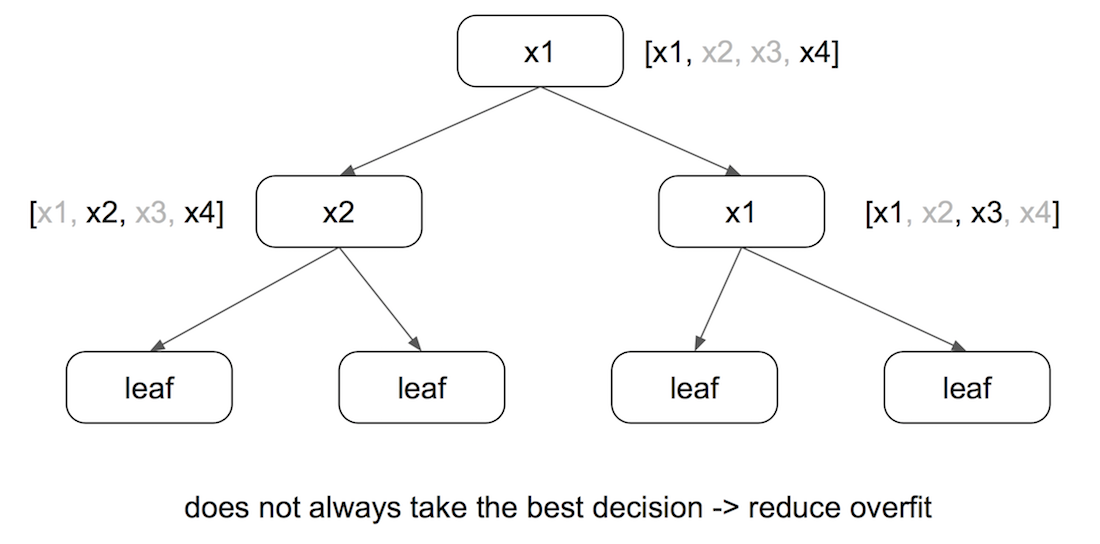

In [17]:
illustration.max_features

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
X=[[2]]
y=[5]

In [20]:
RandomForestClassifier().fit(X,y)

RandomForestClassifier()

In [21]:
from luwiji.knn import illustration,demo

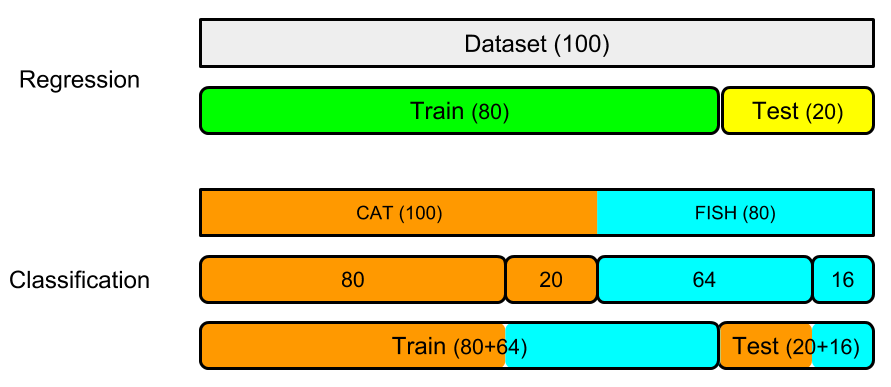

In [23]:
illustration.train_test_split

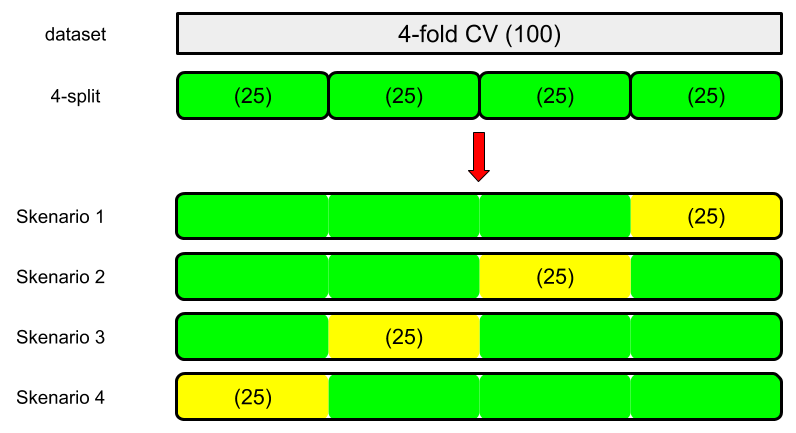

In [22]:
illustration.kfold_cv

In [ ]:
cv=cross validation
kfold =>
cv=5
cv=4

iterasi 1-iterasi 4

# implementasi

In [24]:
import sklearn
import statsmodels
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [25]:
from sklearn.datasets import load_boston

In [26]:
boston = load_boston()
df=pd.DataFrame(data=boston['data'],columns=boston['feature_names'])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [27]:
target=pd.Series(boston['target'])

In [28]:
df['price']=target

In [29]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


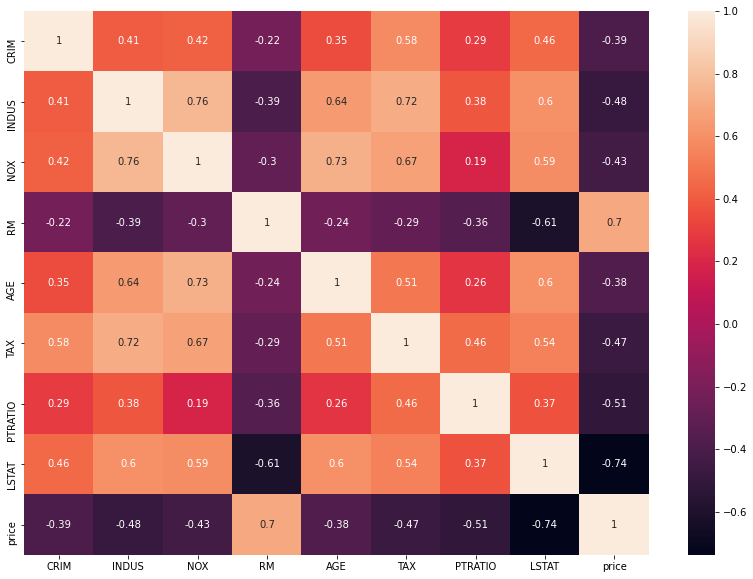

In [100]:
plt.figure(figsize=(14,10))

sns.heatmap(df.corr(), annot=True)
plt.show()

In [37]:
## feature engineering and feature selection

In [30]:
# di drop yang kolerasinya dibawah 0.5
df.drop(columns=['B','RAD','DIS','CHAS','ZN'],inplace=True)# karena kolerasinya banyak jadi milih yang diatas 0.5

In [31]:
X=df.drop(columns='price')
y=df['price']

In [32]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=.8,random_state=42)

In [42]:
## base model

In [43]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [47]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [48]:
# base knn

In [44]:
base_KNN=KNeighborsRegressor()

In [45]:
base_KNN.fit(X_train,y_train)

KNeighborsRegressor()

In [46]:
y_baseKNN=base_KNN.predict(X_test)

In [49]:
r2_base_KNN=r2_score(y_test,y_baseKNN)
r2_base_KNN

0.46521194349389816

In [50]:
MAE_base_KNN=mean_absolute_error(y_test,y_baseKNN)
MAE_base_KNN

4.02705882352941

In [51]:
MSE_base_KNN=mean_squared_error(y_test,y_baseKNN)
MSE_base_KNN

39.218031372549014

In [52]:
RMSE_base_KNN=np.sqrt(MSE_base_KNN)
RMSE_base_KNN

6.2624301491153584

In [ ]:
#BASE DECISSION TREE

In [53]:
base_DT=DecisionTreeRegressor()

In [54]:
base_DT.fit(X_train,y_train)

DecisionTreeRegressor()

In [55]:
y_baseDT=base_DT.predict(X_test)

In [56]:
r2_base_DT=r2_score(y_test,y_baseDT)
r2_base_DT

0.8249101649109104

In [57]:
MAE_base_DT=mean_absolute_error(y_test,y_baseDT)
MAE_base_DT

2.654901960784313

In [58]:
MSE_base_DT=mean_squared_error(y_test,y_baseDT)
MSE_base_DT

12.84

In [59]:
RMSE_base_DT=np.sqrt(MSE_base_DT)
RMSE_base_DT

3.5832945734337835

In [60]:
## BASE RANDOM FOREST

In [61]:
base_RF=RandomForestRegressor()

In [62]:
base_RF.fit(X_train,y_train)

RandomForestRegressor()

In [63]:
y_baseRF=base_RF.predict(X_test)

In [64]:
r2_base_RF=r2_score(y_test,y_baseRF)
r2_base_RF

0.8695208971508355

In [65]:
MAE_base_RF=mean_absolute_error(y_test,y_baseRF)
MAE_base_RF

2.0798039215686273

In [67]:
MSE_base_RF=mean_squared_error(y_test,y_baseRF)
MSE_base_RF

9.568526235294112

In [68]:
RMSE_base_RF=np.sqrt(MSE_base_RF)
RMSE_base_RF

3.0933034502444325

## HYPER PARAMETER TUNING
- ketika melakukan hyper parameter tuning, nilai default setiap parameterharus diikut sertakan

In [69]:
## KNN Hyper parameter tuning

In [110]:
KNN_tuned = KNeighborsRegressor()

In [111]:
param_KNN = {"n_neighbors" : [5, 15, 25, 35, 75],
            "weights" : ["uniform", "distance"],
            "p" : [1,2]}

In [112]:
model_KNN = GridSearchCV(estimator=KNN_tuned, param_grid=param_KNN, n_jobs = -1, cv = 5, verbose=1 )
#verbose ngeluarin dia lagi ngerun apa 

In [113]:
model_KNN.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.7s finished


GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 15, 25, 35, 75], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [114]:
model_KNN.best_params_

{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

In [115]:
model_KNN.best_score_

0.6681907271013949

In [116]:
model_KNN.best_estimator_

KNeighborsRegressor(p=1, weights='distance')

In [117]:
KNN_tuned=model_KNN.best_estimator_

In [118]:
y_tunedKNN=KNN_tuned.predict(X_test)

In [119]:
r2_tunedKNN=r2_score(y_test,y_tunedKNN)
r2_tunedKNN

0.5499160810052925

In [120]:
MAE_tunedKNN=mean_absolute_error(y_test,y_tunedKNN)
MAE_tunedKNN

3.4905336305116634

In [121]:
MSE_tunedKNN=mean_squared_error(y_test,y_tunedKNN)
MSE_tunedKNN

33.00635651950624

In [122]:
RMSE_tunedKNN=np.sqrt(MSE_tunedKNN)
RMSE_tunedKNN

5.745115883905759

-- SIMPLE MODEL AND COMPLEX MODEL

In [79]:
### decision tree hyperparameter tuning

In [80]:
DT_tuned=DecisionTreeRegressor()

In [85]:
param_DT={'max_depth':[None,5,7,9,20,25],
         'min_samples_split':[2,9,15,25],
         'min_samples_leaf':[1,2,5,10],
         'max_features':[None,.8,.7,.6]}

In [86]:
model_DT=GridSearchCV(estimator=DT_tuned,param_grid=param_DT,cv=3,n_jobs=-1,verbose=1)

In [87]:
model_DT.fit(X_train,y_train)

Fitting 3 folds for each of 384 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:    4.2s finished


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 7, 9, 20, 25],
                         'max_features': [None, 0.8, 0.7, 0.6],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 9, 15, 25]},
             verbose=1)

In [88]:
model_DT.best_params_

{'max_depth': None,
 'max_features': 0.6,
 'min_samples_leaf': 2,
 'min_samples_split': 25}

In [89]:
DT_tuned=model_DT.best_estimator_

In [90]:
y_tunedDT=DT_tuned.predict(X_test)

In [91]:
r2_tunedDT=r2_score(y_test,y_tunedDT)
r2_tunedDT

0.6819478807266725

In [92]:
MAE_tunedDT=mean_absolute_error(y_test,y_tunedDT)
MAE_tunedDT

3.124211507432886

In [93]:
MSE_tunedDT=mean_squared_error(y_test,y_tunedDT)
MSE_tunedDT

23.323965148471377

In [94]:
RMSE_tunedDT=np.sqrt(MSE_tunedDT)
RMSE_tunedDT

4.829489118785896

In [95]:
# RANDOM FOREST HYPER PARAMETER TUNING

In [96]:
RF=RandomForestRegressor()

In [97]:
param_RF={'n_estimators':[100,200,500,700,1000],
          'max_depth':[None,5,7,9,20,25],
          'min_samples_split':[2,9,15,25],
          'min_samples_leaf':[1,2,5,10],
          'max_features':[None,.8,.7,.6]
         }

In [98]:
model_RF=GridSearchCV(estimator=RF,param_grid=param_RF,cv=4,n_jobs=-1,verbose=1)

In [99]:
model_RF.fit(X_train,y_train)

Fitting 4 folds for each of 1920 candidates, totalling 7680 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   43.7s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed: 18.1min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed: 21.4min
[Parallel(n_jobs=-1)]: Done 7680 out of 7680 | elapsed: 22.7min finished


GridSearchCV(cv=4, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 7, 9, 20, 25],
                         'max_features': [None, 0.8, 0.7, 0.6],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 9, 15, 25],
                         'n_estimators': [100, 200, 500, 700, 1000]},
             verbose=1)

In [101]:
model_RF.best_params_

{'max_depth': 9,
 'max_features': 0.6,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [102]:
RF_tuned = model_RF.best_estimator_

In [103]:
y_tunedRF = RF_tuned.predict(X_test)

In [104]:
r2_tuned_RF = r2_score(y_test, y_tunedRF)
r2_tuned_RF

0.8602267470664828

In [105]:
MAE_tuned_RF = mean_absolute_error(y_test, y_tunedRF)
MSE_tuned_RF = mean_squared_error(y_test, y_tunedRF)
RMSE_tuned_RF = np.sqrt(MSE_tuned_RF)

In [106]:
MAE_tuned_RF

2.054251158671536

In [107]:
MSE_tuned_RF

10.250101422239524

In [108]:
RMSE_tuned_RF

3.2015779581699277

In [125]:
data={
    'base KNN':[MAE_base_KNN,MSE_base_KNN,RMSE_base_KNN,r2_base_KNN],
    'base DTree':[MAE_base_DT,MSE_base_DT,RMSE_base_DT,r2_base_DT],
    'base RF':[MAE_base_RF,MSE_base_RF,RMSE_base_RF,r2_base_RF],
    'KNN Tuned':[MAE_tunedKNN,MSE_tunedKNN,RMSE_tunedKNN,r2_tunedKNN],
    'Dtree Tuned':[MAE_tunedDT,MSE_tunedDT,RMSE_tunedDT,r2_tunedDT],
    'RF Tuned':[MAE_tuned_RF,MSE_tuned_RF,RMSE_tuned_RF,r2_tuned_RF]
}

In [126]:
pd.DataFrame(data=data,index=['MAE','MSE','RMSE','R2']).T.sort_values(by='R2',ascending=False)

,MAE,MSE,RMSE,R2
base RF,2.079804,9.568526,3.093303,0.869521
RF Tuned,2.054251,10.250101,3.201578,0.860227
base DTree,2.654902,12.840000,3.583295,0.824910
Dtree Tuned,3.124212,23.323965,4.829489,0.681948
KNN Tuned,3.490534,33.006357,5.745116,0.549916
base KNN,4.027059,39.218031,6.262430,0.465212
